<a href="https://colab.research.google.com/github/crzysab/Data-Science-Real-Projects-in-Python/blob/main/Predict_Temperature_of_Different_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict Temperature of Different Cities using Time Series Analysis  Algorithms**

___

**Analyse Whether Global Warming
exists or not**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')
global_temp = pd.read_csv("/content/drive/My Drive/dataset/GlobalTemperatures.csv")

Mounted at /content/drive


In [3]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Mendapatkan data tahun
global_temp['dt'][0].split('-')[0]

'1750'

In [5]:
def fetch_year(date):
  return date.split('-')[0]

In [6]:
#Menggunakan fungsi fetch_year ke dalam kolom dt dan membuat kolom baru

global_temp['years']=global_temp['dt'].apply(fetch_year)

In [7]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [8]:
#Mendapatkan Nilai Rata-Rata Pertahun

data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean', 'LandAverageTemperatureUncertainty':'mean'}).reset_index()
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [9]:
data['uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,uncertainty_top,uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [10]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'uncertainty_top', 'uncertainty_bottom'],
      dtype='object')

In [ ]:
pip install plotly

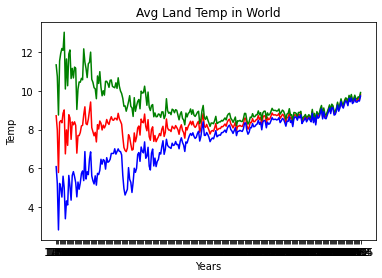

In [11]:
plt.plot(data['years'], data['LandAverageTemperature'], 'r-' )
plt.plot(data['years'], data['uncertainty_top'], 'g-' )
plt.plot(data['years'], data['uncertainty_bottom'], 'b-' )
plt.title('Avg Land Temp in World')
plt.xlabel('Years')
plt.ylabel('Temp')
plt.show()

In [12]:
#fig = px.line(data, x='years', y=['LandAverageTemperature', 'uncertainty_top', 'uncertainty_bottom'], title='Avg Land Temp in World')
fig = px.line(data, x='years', y='LandAverageTemperature', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_top', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_bottom', title='Avg Land Temp in World')
fig.show()

**Explore Average Temperature of Each
Season**

In [13]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [14]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [15]:
#Mengubah tipe data menjadi datetime
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [16]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [17]:
global_temp['month'] = global_temp['dt'].dt.month

In [18]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [19]:
#Membuat fungsi untuk mendapatkan kategori musim

def get_season(month):
  if month>=3 and month<=5 :
    return 'spring'
  elif month>=6 and month<=8 :
    return 'summer'
  elif month>= 9 and month<=11:
    return 'autumn'
  else:
    return 'winter'

In [20]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [21]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [22]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [23]:
years = global_temp['years'].unique()

In [24]:
for year in years:
  current_df = global_temp[global_temp['years']==year]
  spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
  summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
  autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
  winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [25]:
season = pd.DataFrame()

In [26]:
season['year'] = years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [27]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [28]:
#fig = px.line(season, x='year', y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'])
fig = px.line(season, x='year', y='winter_temps')
fig.show()

**Perform Data Pre-Processing on your data**

In [29]:
drive.mount('/content/drive')
cities = pd.read_csv("/content/drive/My Drive/dataset/GlobalLandTemperaturesByCity.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [31]:
cities.shape

(8599212, 7)

In [32]:
#Data USA
usa = cities[cities['Country']=='United States']

In [33]:
usa.shape

(687289, 7)

In [34]:
#Filter untuk 2 kota
data = ['New York', 'Los Angeles', 'San Francisco']

In [35]:
data2 = usa[usa['City'].isin(data)]
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [36]:
#Filter untuk membuat dataframe yang kolom dt dan AverageTemperature
data2 = data2[['dt','AverageTemperature']]

In [37]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [38]:
data2.columns = ['Date','Temp']

In [39]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [40]:
#Mengubah tipe data dt menjadi datetime
data2['Date'] = pd.to_datetime(data2['Date'])

In [41]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [42]:
#Menghapus Missing Value
data2.dropna(inplace=True)

In [43]:
data2.isna().sum()

Date    0
Temp    0
dtype: int64

In [44]:
data2.shape

(7073, 2)

In [45]:
#Memperbaharui index data
data2.set_index('Date',inplace=True)

In [46]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


**How to check Whether Data is
Stationery or not**

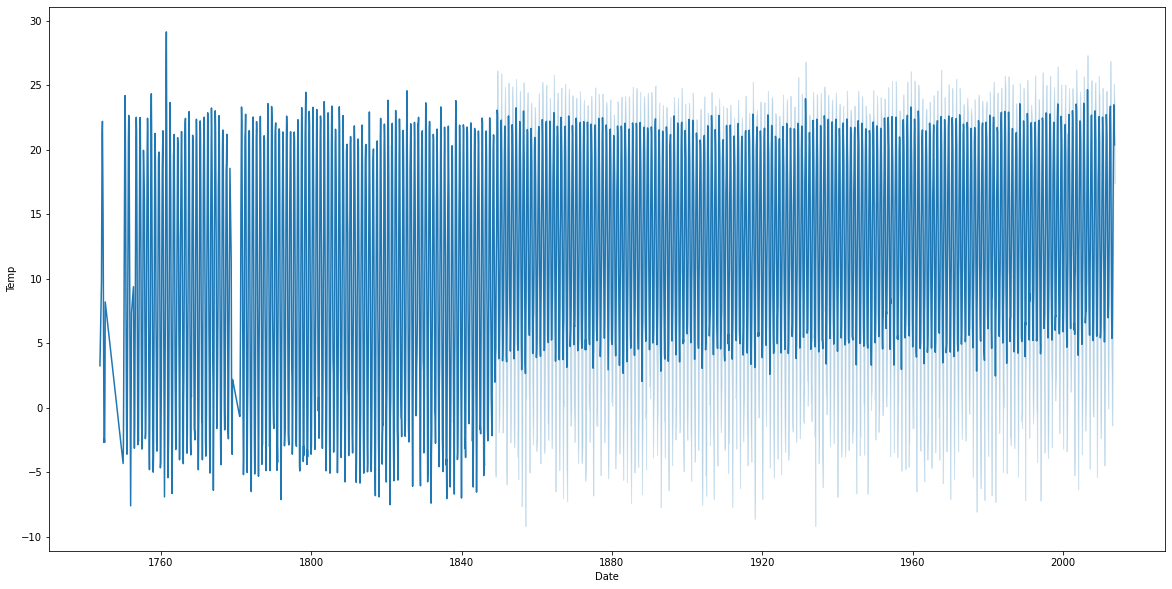

In [47]:
plt.figure(figsize=(20,10))

import seaborn as sns
sns.lineplot(x=data2.index, y=data2['Temp'])

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
adfuller(data2['Temp'])

(-2.0063893036757956,
 0.28377865833332594,
 35,
 7037,
 {'1%': -3.431279613044704,
  '10%': -2.5669886726127307,
  '5%': -2.8619508146206374},
 28011.222669408726)

In [50]:
def adfuller_test(Temp):
  result = adfuller(Temp)
  labels = ['ADF Test stats','p-value','flags used','no of observation used']

  for value,label in zip(result,labels):
    print('{} : {}'.format(label,value))
  
  if result[1]<=0.05:
    print('Strong Evidence Against the null hypo, hence we can reject the null hypo and data is stationery')
  else :
    print('Weak Evidence Against the null hypo, hence we have failed to reject the null hypo and data is not stationery')

In [51]:
adfuller_test(data2['Temp'])

ADF Test stats : -2.0063893036757956
p-value : 0.28377865833332594
flags used : 35
no of observation used : 7037
Weak Evidence Against the null hypo, hence we have failed to reject the null hypo and data is not stationery


**How to make your Data Stationary ?**

In [52]:
#Membuat backup DataFrame
df = data2.copy()

In [53]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [54]:
df['first_diff_temp'] = df['Temp'] - df['Temp'].shift(12)

In [55]:
df.head(20)

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [56]:
adfuller_test(df['first_diff_temp'].dropna())

ADF Test stats : -21.23965040491091
p-value : 0.0
flags used : 35
no of observation used : 7025
Strong Evidence Against the null hypo, hence we can reject the null hypo and data is stationery


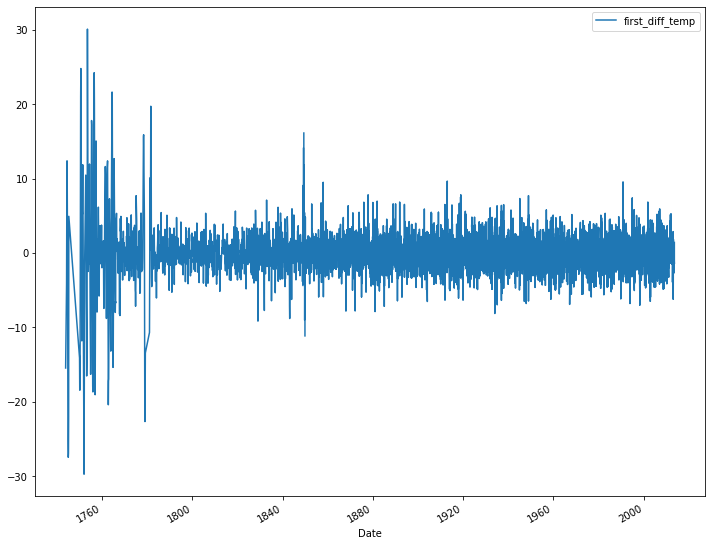

In [57]:
df[['first_diff_temp']].plot(figsize=(12,10))

**Examine seasonality in a data**

In [58]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [59]:
data2['month'] = data2.index.month

In [60]:
data2['year'] = data2.index.year

In [61]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [62]:
pivot = data2.pivot_table(values='Temp', index='month', columns='year')

In [63]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1781,1782,1783,1784,1785,1786,1787,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,-4.790,-4.982,-3.350,-4.200,-6.900,NaN,-6.632,-3.228,-4.023,-4.324,-3.511,-3.644,-1.794,-4.794,-0.039,-3.740,-2.708,-6.386,-1.127,-4.406,-1.703,-2.395,-3.598,-0.665,-5.170,-5.014,-6.080,-5.126,-5.301,-3.090,...,5.127667,5.626000,4.656000,2.853000,5.315667,4.232000,6.137667,4.609333,2.471333,5.545667,5.025667,3.456333,6.919667,4.341333,4.239333,5.147667,6.616333,5.261000,5.225000,5.428667,4.193667,6.597333,5.424333,5.256000,7.141667,5.741000,5.895000,4.700000,6.146333,6.581000,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,-1.507,-3.689,-0.007,-1.327,-2.162,-2.559,-4.010,0.683,-0.558,0.621,-2.073,1.139,-2.480,-1.657,-4.020,-1.898,-5.051,-1.681,1.335,-1.976,-1.677,NaN,2.204,-0.648,-3.844,-0.450,-6.486,-3.453,-2.107,-2.790,...,5.662667,6.281667,7.368333,7.452667,5.175333,3.688333,6.836000,8.354667,6.975333,7.220000,7.720333,6.714000,7.027000,6.387333,7.453000,5.177000,6.446333,8.873667,8.014000,5.216667,4.808333,7.207333,7.335333,7.907333,7.082000,6.718000,7.085667,5.958667,8.562333,5.698667,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,2.260,1.532,2.711,1.358,3.621,0.760,0.710,2.562,3.977,2.801,2.647,0.857,2.086,0.316,2.995,-0.539,2.469,3.005,4.784,1.712,2.658,NaN,2.134,2.728,0.662,1.627,0.747,-1.343,4.104,3.155,...,9.027000,7.811000,9.111333,8.860000,9.616333,9.672667,8.304333,8.616333,7.892333,9.554000,9.205000,8.559000,10.600667,9.539333,10.487000,9.740667,9.968333,8.267667,9.111667,9.618333,9.729667,9.750667,9.155667,10.656667,9.817000,8.002667,10.464333,9.645667,9.430000,10.064000,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,7.666,7.768,7.991,8.617,8.279,9.184,8.061,NaN,9.915,8.662,8.550,6.302,8.157,8.689,8.771,9.009,9.441,12.664,8.367,8.185,7.094,NaN,NaN,7.723,10.131,8.539,6.116,7.245,8.086,8.756,...,12.383667,9.173333,11.731000,13.274333,11.294667,12.076000,12.665333,13.318333,11.412000,11.080333,11.978667,13.967333,12.623667,14.256000,12.559667,13.814667,13.552333,12.525000,13.680667,13.064667,13.179333,11.791333,13.601333,12.861333,11.865000,11.593667,13.185000,11.586000,13.032667,10.623000,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,15.332,13.844,14.739,14.091,18.068,15.511,13.984,NaN,15.262,15.176,13.560,13.484,13.858,14.300,16.185,13.882,16.254,NaN,17.038,NaN,13.042,13.965,NaN,14.866,15.515,15.389,14.210,13.007,14.358,13.978,...,15.614333,16.759333,16.382333,14.889000,16.615000,16.897333,15.415000,16.602333,16.372333,15.829333,17.296333,16.205333,16.896333,17.149667,16.171333,16.125667,15.613333,16.211000,17.499333,17.112667,15.531667,14.833333,16.592333,17.981000,15.105333,15.567000,17.351000,18.744667,15.693333,15.874000,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,22.461,19.097,19.267,18.554,25.728,20.677,19.517,17.642,NaN,20.605,NaN,17.737,20.674,19.440,20.092,19.348,20.253,19.994,18.539,19.891,18.438,18.564,NaN,19.033,21.032,21.182,19.949,20.938,20.754,19.443,...,19.653667,19.174333,20.658000,19.615667,19.776333,19.849667,18.431667,

Text(0, 0.5, 'Temperatures')

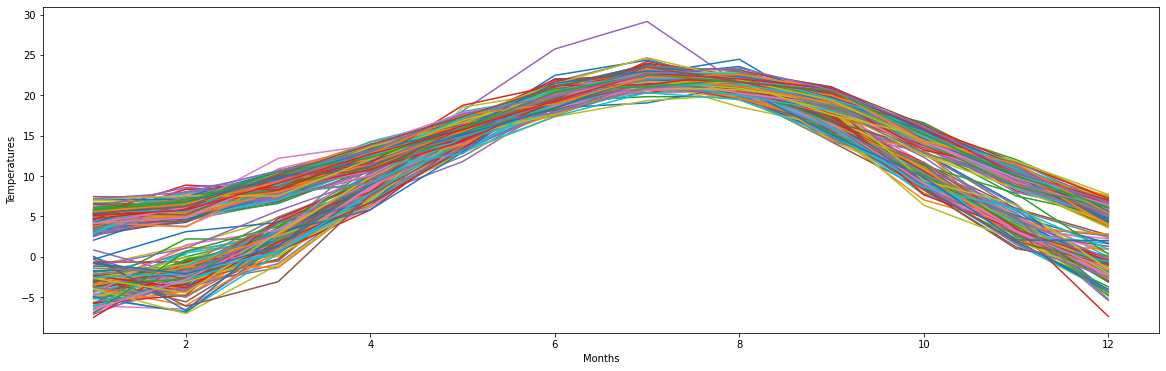

In [66]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

In [67]:
monthly_seasonality = pivot.mean(axis=1)

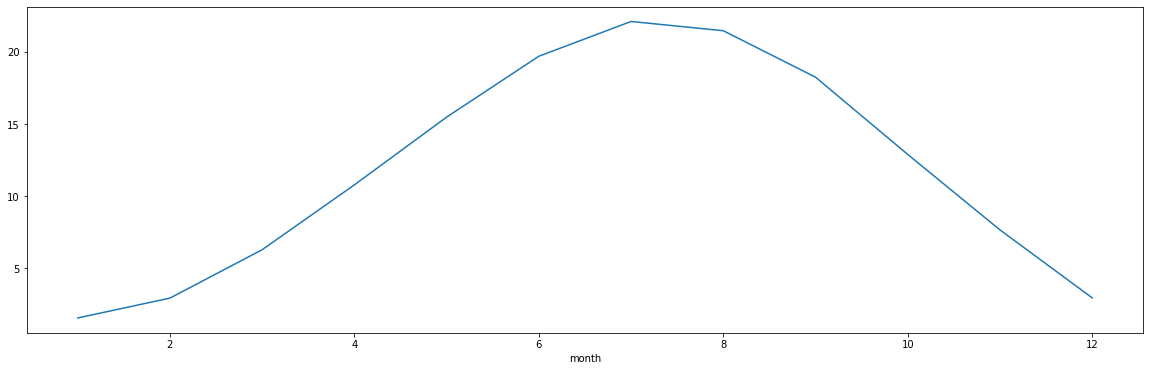

In [69]:
monthly_seasonality.plot(figsize=(20,6))